In [18]:
#import warnings
#warnings.filterwarnings(action = 'ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [2]:
#tips = pd.read_csv('data/tips.csv')
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

In [3]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

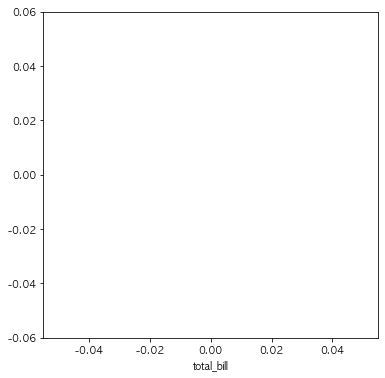

In [4]:
plt.figure(figsize = (6, 6))
sns.rugplot(tips['total_bill'])
plt.show()

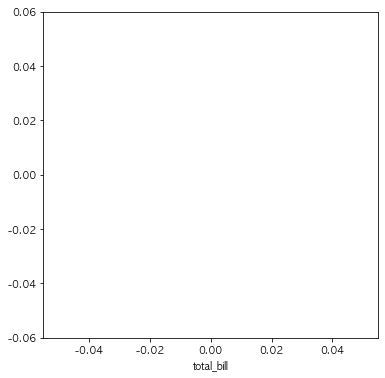

In [6]:
plt.figure(figsize = (6, 6))
sns.rugplot('total_bill', data = tips)
plt.show()
# 컬럼명: 문자열
# data: DataFrame 객체

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

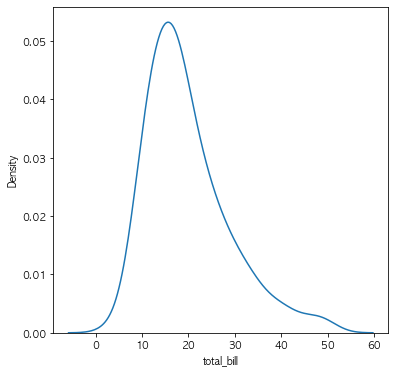

In [11]:
plt.figure(figsize = (6, 6))
#sns.kdeplot(tips['total_bill'])
sns.kdeplot('total_bill', data = tips)
plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.
    - kdeplot은 default로 나오고 rugplot은 default로 안나온다.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


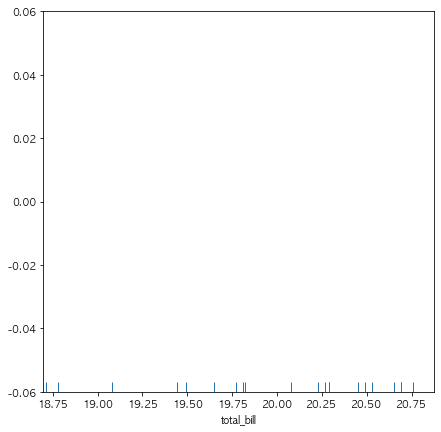

In [8]:
plt.figure(figsize = (7, 7))
#sns.distplot(tips['total_bill'])
sns.distplot(tips['total_bill'],
             hist = False,  # default가 True
             kde = False,  # default가 True
             rug = True)  # default가 False
plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

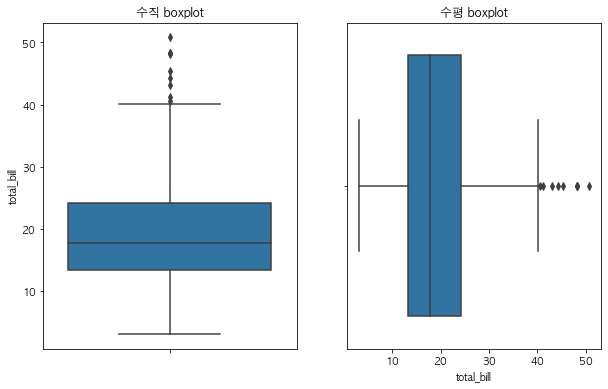

In [10]:
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y = tips['total_bill'])  # 수직형태
plt.title('수직 boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'total_bill', data = tips)
plt.title('수평 boxplot')

plt.show()

In [13]:
tips['smoker'].value_counts(), tips['smoker'].unique()

(No     151
 Yes     93
 Name: smoker, dtype: int64,
 ['No', 'Yes']
 Categories (2, object): ['No', 'Yes'])

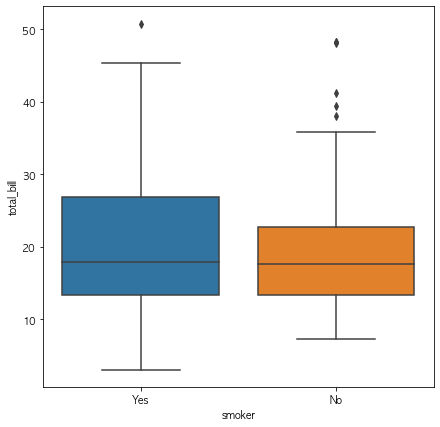

In [15]:
plt.figure(figsize = (7, 7))
sns.boxplot(y = 'total_bill', x = 'smoker', data = tips)
# x(y)축: 분포를 보려는 연속형 값의 컬럼, y(x)축: 그룹을 나누려는 범주형 컬럼
plt.show()

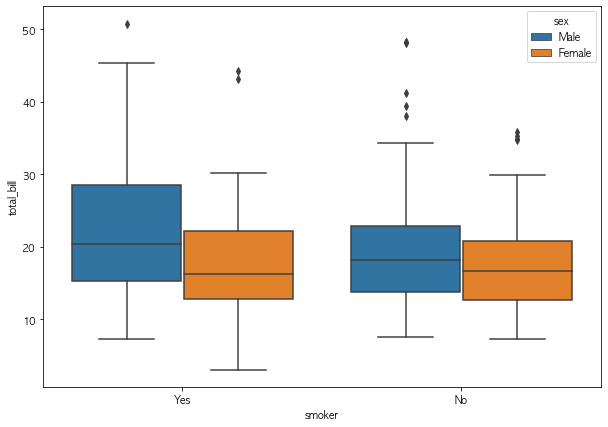

In [16]:
plt.figure(figsize = (10, 7))
sns.boxplot(y = 'total_bill', x = 'smoker', hue = 'sex', data = tips)
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

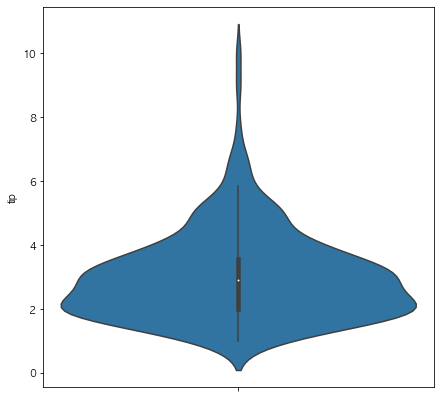

In [20]:
plt.figure(figsize = (7, 7))
sns.violinplot(y = 'tip', data = tips)
plt.show()

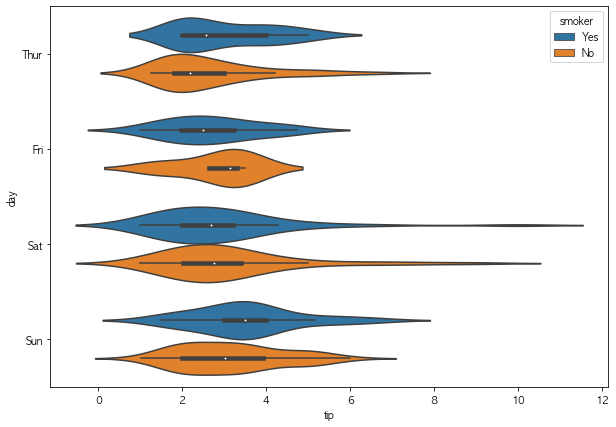

In [24]:
# 요일(day)별 팁의 분포
plt.figure(figsize = (10, 7))
#sns.violinplot(y = 'tip', x = 'day', data = tips)
#sns.violinplot(y = 'tip', x = 'day', hue = 'smoker', data = tips)  # 요일 - 흡연 여부
sns.violinplot(x = 'tip', y = 'day', hue = 'smoker', data = tips)
plt.show()

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

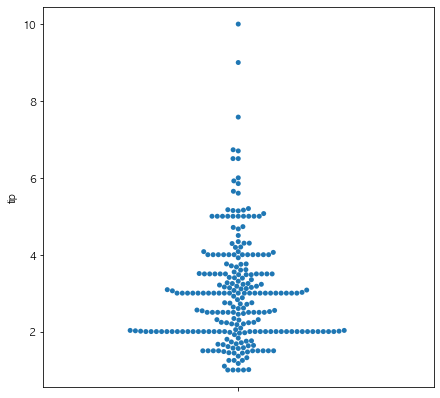

In [26]:
plt.figure(figsize = (7, 7))
sns.swarmplot(y = 'tip', data = tips)
plt.show()

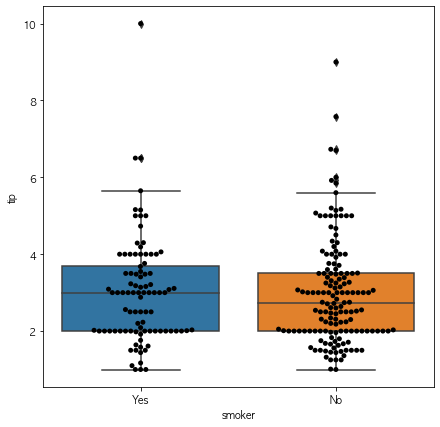

In [30]:
plt.figure(figsize = (7, 7))
sns.boxplot(x = 'smoker', y = 'tip', data = tips)
sns.swarmplot(x = 'smoker', y = 'tip', data = tips, color = 'k')
plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

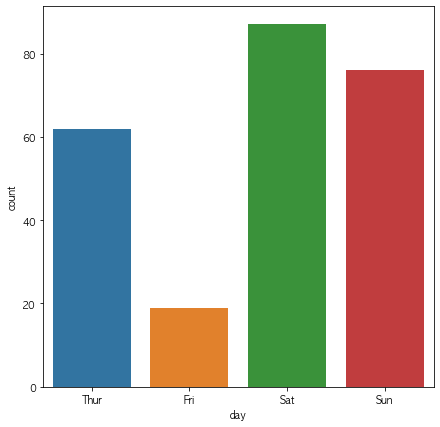

In [31]:
plt.figure(figsize = (7, 7))
# 축에다 범주형 컬럼을 지정하면, 고유값 별로 count를 한 후 결과를 막대그래프로 표현한다.
sns.countplot(x = 'day', data = tips)
plt.show()

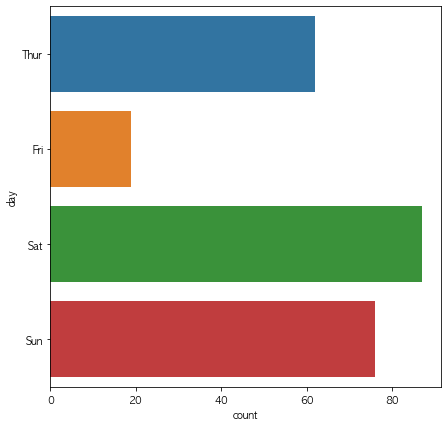

In [32]:
plt.figure(figsize = (7, 7))
# 축에다 범주형 컬럼을 지정하면, 고유값 별로 count를 한 후 결과를 막대그래프로 표현한다.
sns.countplot(y = 'day', data = tips)
plt.show()

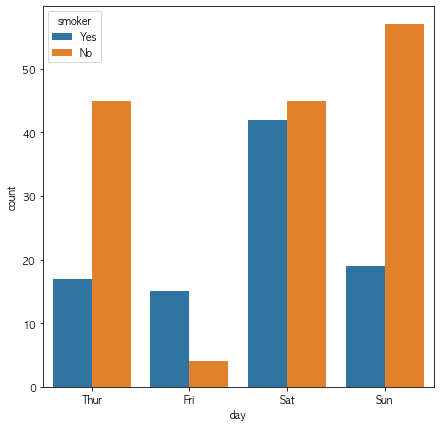

In [34]:
# 요일별 - 흡연 여부 별로 
plt.figure(figsize = (7, 7))
sns.countplot(x = 'day', hue = 'smoker', data = tips)
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

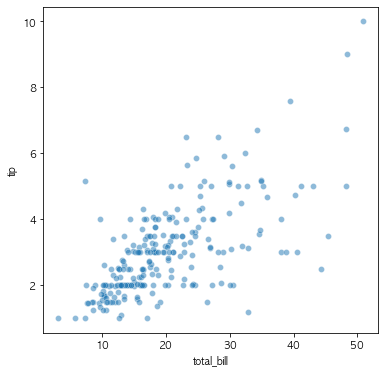

In [36]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, alpha = 0.5)
plt.show()

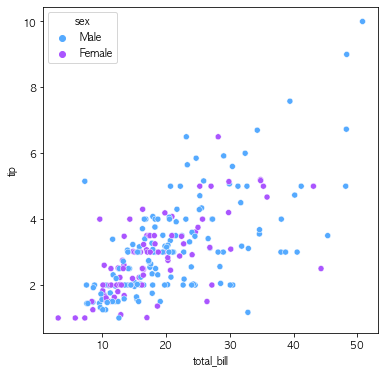

In [40]:
# 성별로 나눠서 확인
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips,
                palette = 'cool')
# colormap 지정: maplotlib/pandas - cmap, seaborn - palette
plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.
- linear model

<Figure size 504x504 with 0 Axes>

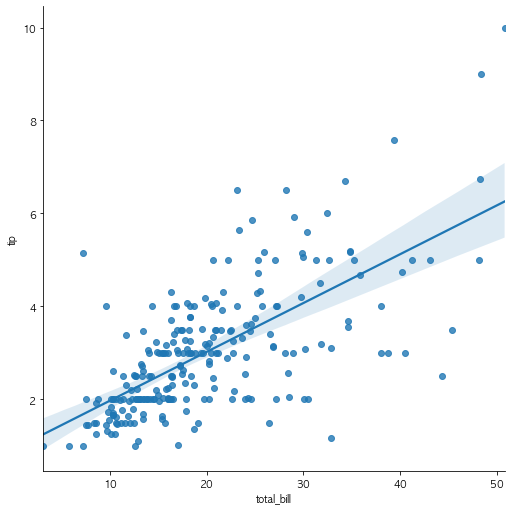

In [43]:
plt.figure(figsize = (7, 7))
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, height = 7)  # height를 통해 사이즈 지정
# total_bill을 가지고 tip을 예측하겠다
plt.show()

<Figure size 504x504 with 0 Axes>

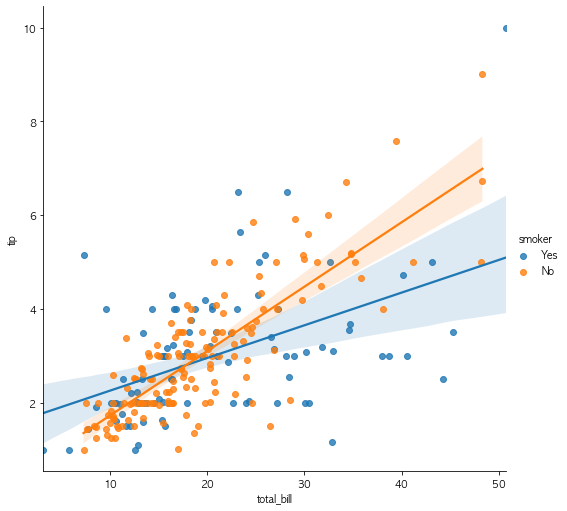

In [44]:
plt.figure(figsize = (7, 7))
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips, height = 7)  # height를 통해 사이즈 지정
# total_bill을 가지고 tip을 예측하겠다
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

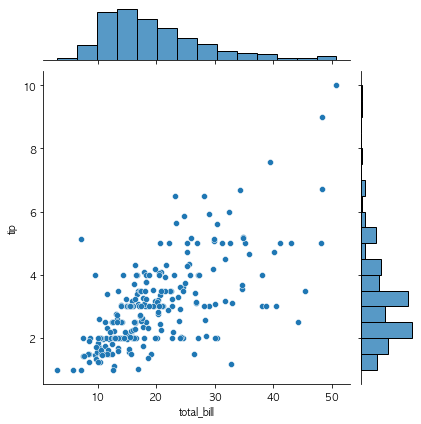

In [45]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.
- 컴퓨터 성능에 따라 그리는 데 오래걸릴 수 있다.

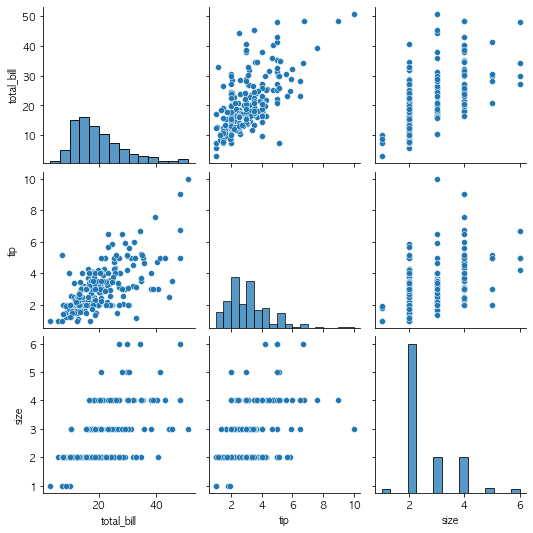

In [48]:
sns.pairplot(tips)
plt.show()

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [49]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


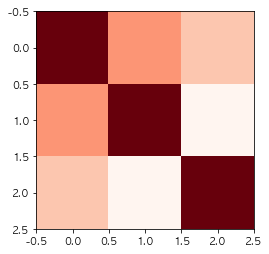

In [52]:
plt.imshow(tips.corr(), cmap = 'Reds')
plt.show()

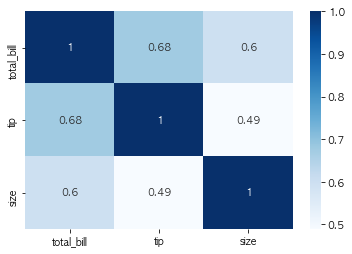

In [58]:
# annot = True -> 갖고있는 값을 히트맵에 표시
# cmap으로 컬러패턴 지정
sns.heatmap(tips.corr(), annot = True, cmap = 'Blues')
plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [60]:
index = pd.date_range('2021/1/1', freq = 'D', periods = 10)
value = np.random.randint(1, 100, size = (10, 3))
df = pd.DataFrame(value, index = index, columns = list('ABC'))
df.head(3)

,A,B,C
2021-01-01,90,67,9
2021-01-02,61,8,22
2021-01-03,50,18,80


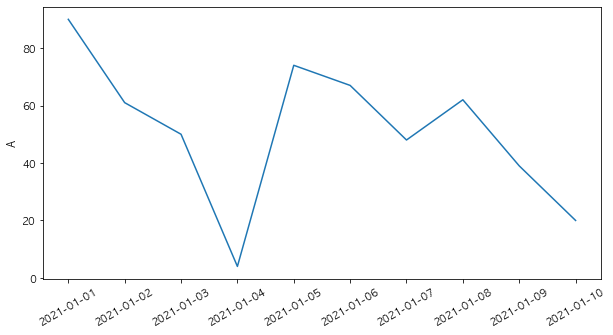

In [66]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = df.index, y = 'A', data = df)
plt.xticks(df.index, rotation = 30)
plt.show()